In [86]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../datasets/parsed_malt_data.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,location,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date
0,Mickael M.,https://dam.malt.com/ecrimpl92gqieb0ijvjo?grav...,Graphiste,-,250,1.00,Quelques jours,['Graphiste'],"['Wordpress', 'Design logo', 'Affiche', 'Carte...",0,"{'Localisation': '21000 Dijon, France'}","Passionné depuis mon enfance par le graphisme,...",0,0,0,mickaelmolina,https://www.malt.fr/profile/mickaelmolina,2013-08-02
1,Nacera TIZI,https://dam.malt.com/erokb7omnnhmf79bojnr?grav...,Commerciale Freelance,-,40,NaN,1h,['Business developers'],['Tanger et tout le Maroc'],0,"{'Localisation': 'Tanger, Tanger-Tétouan, Maroc'}",Parce que La ville de Tanger tend à devenir l'...,0,0,0,naceratizi,https://www.malt.fr/profile/naceratizi,2014-02-22
2,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15 ans,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,"{'Localisation': 'La Rochelle, France'}",SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06
3,Youri Galescot,https://dam.malt.com/r3nb6gaf6723bi1unhhx?grav...,Développeur web frontend et backend,-,235,0.33,12h,[],"['PHP', 'HTML5', 'CSS3', 'SEO', 'jQuery', 'Res...",0,"{'Localisation': 'Paris, France'}","Bonjour,Je suis développeur frontend et backen...",0,0,0,yourigalescot,https://www.malt.fr/profile/yourigalescot,2014-02-18
4,Julien Trezeux,https://dam.malt.com/pllhwpaapz84yfqmc7rw?grav...,directeur artistique - graphiste - illustrateur,8-15 ans,350,1.00,1h,"['Photographe', 'Graphiste', 'Illustrateur']","['Direction artistique', 'Graphisme', 'Design ...",0,"{'Localisation': 'Paris, France / www.graphicf...","Graphiste et directeur artistique depuis 2007,...",3,0,0,julientrezeux,https://www.malt.fr/profile/julientrezeux,2014-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33755,Andressa Molinari,https://dam.malt.com/iy7gl5dx2nnugo8a1pam?grav...,Traductrice français/portugais,0-2 ans,130,NaN,1h,['Traducteur'],"['Traduction Français Portugais', 'brésilienne...",0,"{'Localisation': 'Lille, France'}",Brésilienne passionnée par la France je vous o...,0,0,0,andressamolinari,https://www.malt.fr/profile/andressamolinari,2018-11-27
33756,Romain Gaillard,https://dam.malt.com/jsgd3vbmfu3bfjev4cbz?grav...,directeur artistique | ui designer,3-7 ans,350,1.00,24h,"['Directeur artistique', 'UI Designer', 'UX De...","['User Interface Design', 'User Experience Des...",0,"{'Localisation': 'Paris, France'}","Bonjour,Avec 5 années d’expériences dans le de...",0,0,0,romaingaillard1,https://www.malt.fr/profile/romaingaillard1,2018-11-23
33757,Joanna Martyn,https://dam.malt.com/fvoe0gnvnvs4rdflao5i?grav...,"Fashion stylist, Social media manager",0-2 ans,150,1.00,1h,"['Community Manager', 'Photographe', 'Directeu...","['Photographie', 'Adobe Photoshop', 'Retouche ...",0,"{'Localisation': 'Paris, France'}","Ambitieuse, travailleuse, créative avec une co...",0,0,0,joannamartyn,https://www.malt.fr/profile/joannamartyn,2018-11-30
33758,Jade Teychenné,https://dam.malt.com/p6asbtfqvil81rrlahkx?grav...,Traducteur - Rédacteur,0-2 ans,125,1.00,1h,"['Concepteur Rédacteur', 'Pigiste', 'Rédacteur...","['Traduction Français Anglais', 'Rédaction web...",0,"{'Localisation': 'Paris, France'}",NaN,0,0,0,jadeteychenne,https://www.malt.fr/profile/jadeteychenne,2018-11-21


### Number of freelancers through time

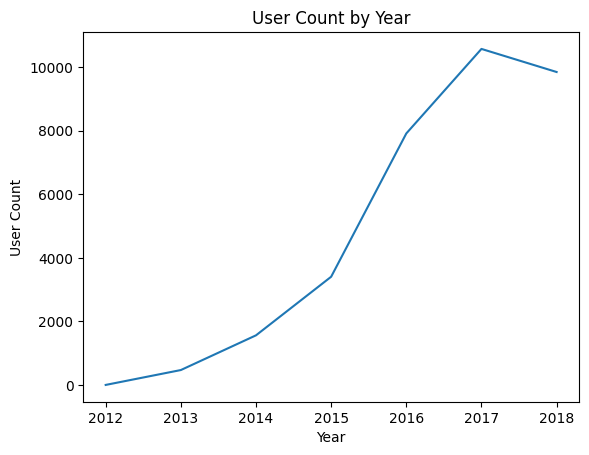

In [87]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

# get only the year from the date
df['year'] = df['creation_date'].dt.year.astype(str).str[:4]

occurences = df['year'].value_counts()

occurences = occurences.sort_index()

# create a new figure
vis.plot()

# sort the data by index
vis.sort_index(kind='bar')

# add a title and labels
plt.title('User Count by Year')
plt.xlabel('Year')
plt.ylabel('User Count')

# show the plot
plt.show()

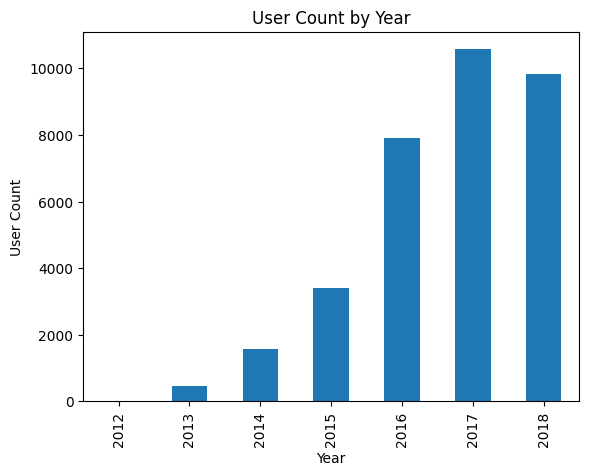

In [88]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

df['year'] = df['creation_date'].dt.year.astype(str).str[:4]

# Compter le nombre d'occurrences pour chaque année
occurrences = df['year'].value_counts()

# sort data by year
occurrences = occurrences.sort_index()

# bar plot
occurrences.plot(kind='bar')

# add a title and labels
plt.title('User Count by Year')
plt.xlabel('Year')
plt.ylabel('User Count')

# plot the data
plt.show()

### Number of supermalter in comparison to malter (barplot) > deduce the percentage of supermalter

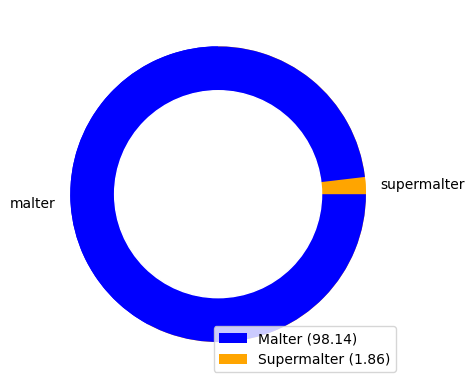

In [89]:
# Filter the occurrences for 'supermalter' and 'malter'
supermalter_count = df['supermalter'] == 1
malter_count = df['supermalter'] == 0

# Create a new dataframe with the counts
comparison_df = [supermalter_count.sum(), malter_count.sum()]

# calculate percentage of supermalter and malter and round to 2 decimals
supermalter_percentage = supermalter_count.sum() / df.shape[0] * 100
malter_percentage = malter_count.sum() / df.shape[0] * 100
supermalter_percentage = round(supermalter_percentage, 2)
malter_percentage = round(malter_percentage, 2)

# create data
names = ['supermalter', 'malter']

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.7, color='white')

labels = ['Malter ('+str(malter_percentage)+')', 'Supermalter ('+str(supermalter_percentage)+')']
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

# Give color names
plt.pie(comparison_df, labels=names, colors=['orange','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

### Number of missions done by malter vs supermalter

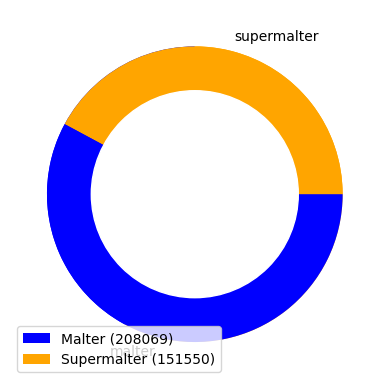

In [90]:
# Filter the occurrences for 'supermalter' and 'malter'
df_supermalter = df[df['supermalter'] == 1]
df_malter = df[df['supermalter'] == 0]

# Create a new dataframe with the counts
supermalter_mission_count = df_supermalter['missions'].sum()
malter_mission_count = df_malter['missions'].sum()

comparison_df = [supermalter_mission_count, malter_mission_count]

# create data
names = ['supermalter', 'malter']

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.7, color='white')

labels = ['Malter ('+str(malter_mission_count)+')', 'Supermalter ('+str(supermalter_mission_count)+')']
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")


# Give color names
plt.pie(comparison_df, labels=names, colors=['orange','blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()